In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import isnan
import scipy.optimize as sco
import time
import datetime as dt
from dateutil.relativedelta import relativedelta
import calendar

In [7]:
frame = pd.read_csv("./csv/useful/adj.csv")

In [8]:
daty = frame.loc[1,"Dates"]
datin = dt.datetime.strptime(daty, '%Y-%m-%d')
daty

'2007-01-02'

In [9]:
datin.year

2007

In [10]:
def count_years(start_date, end_date):
    init_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
    endin_date = dt.datetime.strptime(end_date, '%Y-%m-%d')
    difference_in_years = endin_date.year - init_date.year
    end_year = dt.datetime.date(endin_date).year
    new_date = dt.datetime(end_year, 1,1)
    diff_in_days = endin_date - new_date
    know = calendar.isleap(end_year)
    if know == True: days = 366
    else: days = 365
    fraction = diff_in_days.days/days
    return difference_in_years + fraction

In [11]:
daty1 = frame.loc[106,"Dates"]
daty2 = frame.loc[1006,"Dates"]
print(daty1, daty2)
count_years(daty1,daty2)

2007-06-01 2010-12-13


3.947945205479452

In [12]:
type(frame.loc[106,"Dates"])

str

In [13]:
(len(frame)-106) // 10 

275

In [14]:
frame.set_index("Dates", inplace=True)

In [15]:
frame.columns

Index(['ABE.MC.Adjusted', 'ANA.MC.Adjusted', 'ACX.MC.Adjusted',
       'ACS.MC.Adjusted', 'AENA.MC.Adjusted', 'AMS.MC.Adjusted',
       'MTS.MC.Adjusted', 'COL.MC.Adjusted', 'SAB.MC.Adjusted',
       'SAN.MC.Adjusted', 'BKIA.MC.Adjusted', 'BKT.MC.Adjusted',
       'BBVA.MC.Adjusted', 'CABK.MC.Adjusted', 'CLNX.MC.Adjusted',
       'DIA.MC.Adjusted', 'ENG.MC.Adjusted', 'ELE.MC.Adjusted',
       'FER.MC.Adjusted', 'SGRE.MC.Adjusted', 'GAS.MC.Adjusted',
       'GRF.MC.Adjusted', 'IBE.MC.Adjusted', 'ITX.MC.Adjusted',
       'IDR.MC.Adjusted', 'IAG.MC.Adjusted', 'MAP.MC.Adjusted',
       'TL5.MC.Adjusted', 'MEL.MC.Adjusted', 'MRL.MC.Adjusted',
       'REE.MC.Adjusted', 'REP.MC.Adjusted', 'TRE.MC.Adjusted',
       'TEF.MC.Adjusted', 'VIS.MC.Adjusted'],
      dtype='object')

In [16]:
frame.index

Index(['2007-01-01', '2007-01-02', '2007-01-03', '2007-01-04', '2007-01-05',
       '2007-01-08', '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
       ...
       '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26', '2018-02-27',
       '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-05', '2018-03-06'],
      dtype='object', name='Dates', length=2856)

In [17]:
len(frame.index)

2856

In [18]:
(len(frame.index)-106) // 240

11

## Max Sharpe

### Time intervals

In [19]:
initial_pos = 106
time_values = [10,20,60,120,240]
cantidades = [1000,5000,10000,50000,100000]

<hr>

#### Prueba

In [20]:
rets = np.log(frame[0:initial_pos]/frame[0:initial_pos].shift(1))
prices = frame.iloc[initial_pos]
assets_used = np.where(prices.isnull()*1 ==0) ###saves the assets which are not Nan
assets_used = np.ravel(np.asarray(assets_used))
prices = prices.values[assets_used] #eliminates all those which are not
rets = rets.iloc[:,assets_used][2:] #returns of the assets used

In [21]:
rets

,ABE.MC.Adjusted,ANA.MC.Adjusted,ACX.MC.Adjusted,ACS.MC.Adjusted,MTS.MC.Adjusted,COL.MC.Adjusted,SAB.MC.Adjusted,SAN.MC.Adjusted,BKT.MC.Adjusted,BBVA.MC.Adjusted,...,ITX.MC.Adjusted,IDR.MC.Adjusted,MAP.MC.Adjusted,TL5.MC.Adjusted,MEL.MC.Adjusted,REE.MC.Adjusted,REP.MC.Adjusted,TRE.MC.Adjusted,TEF.MC.Adjusted,VIS.MC.Adjusted
Dates,,,,,,,,,,,,,,,,,,,,,
2007-01-03,0.002645,-0.010894,-0.026341,0.000465,-0.042256,-0.002093,0.011495,0.000687,0.022398,0.009552,...,0.000735,0.010537,0.016666,0.005925,0.013739,-0.051658,-0.003009,-0.000692,0.004870,0.000698
2007-01-04,-0.002645,-0.008873,-0.063645,-0.010051,-0.027998,-0.013688,0.000000,0.005506,-0.005759,0.000000,...,-0.000490,-0.022795,0.019101,-0.016032,0.002596,-0.046804,-0.000754,-0.020641,0.012668,-0.007706
2007-01-05,-0.009319,-0.023446,0.009951,-0.014910,0.011681,0.013688,0.002855,-0.006193,0.044355,-0.010091,...,-0.007627,-0.004837,0.052644,-0.015832,-0.011734,0.031781,-0.018642,-0.028323,0.006570,0.024315
2007-01-08,0.008438,-0.001461,-0.011857,0.005943,-0.008098,-0.007696,0.008509,-0.004151,0.004939,-0.002670,...,0.002959,0.009118,0.005115,-0.002347,0.007187,-0.006750,-0.003462,0.018019,0.009485,0.023738
2007-01-09,0.002207,0.013433,0.001430,0.005437,0.004219,0.003855,0.005635,0.000000,-0.001644,0.003208,...,-0.001232,0.005856,0.000000,0.005159,0.025708,-0.006795,-0.018670,0.028518,-0.006508,-0.001341
2007-01-10,-0.010645,0.001442,-0.035891,-0.041638,-0.001297,-0.011974,-0.014144,-0.021711,-0.032598,-0.010948,...,0.009814,-0.014435,-0.028463,-0.003751,-0.007643,-0.032222,-0.009864,0.040475,-0.019793,-0.014194
2007-01-11,0.007551,0.027350,0.012270,0.018988,0.010965,0.004242,0.008509,0.012662,0.021851,0.017230,...,0.020540,0.018672,0.007842,0.019075,0.004466,0.029490,0.015566,0.032790,0.017412,0.013523
2007-01-12,-0.003104,-0.005974,0.000000,0.015552,0.004480,0.001763,0.014025,-0.000697,0.000830,0.010624,...,-0.008648,-0.009559,0.015506,0.001380,0.010133,0.005796,-0.001189,-0.016261,0.007121,0.000671
2007-01-15,-0.004447,0.010316,0.009709,-0.001679,0.021792,0.057139,0.008323,0.002097,0.000831,0.007368,...,-0.000966,0.013252,-0.002568,-0.000458,-0.001261,0.004747,0.007112,0.011086,0.000592,0.010681


In [22]:
#is the mean different with nan or not. Seems not
print(np.mean((np.log(frame/frame.shift(1)))[~np.isnan(np.log(frame/frame.shift(1)))]))
np.mean((np.log(frame/frame.shift(1))))

ABE.MC.Adjusted     1.381714e-04
ANA.MC.Adjusted    -9.226190e-05
ACX.MC.Adjusted    -6.902638e-05
ACS.MC.Adjusted     4.927432e-05
AENA.MC.Adjusted    9.630399e-04
AMS.MC.Adjusted     8.911170e-04
MTS.MC.Adjusted    -2.981070e-04
COL.MC.Adjusted    -1.811990e-03
SAB.MC.Adjusted    -2.039387e-04
SAN.MC.Adjusted     8.740782e-06
BKIA.MC.Adjusted   -2.265757e-03
BKT.MC.Adjusted     2.502803e-04
BBVA.MC.Adjusted   -1.240480e-04
CABK.MC.Adjusted    1.018470e-04
CLNX.MC.Adjusted    4.499884e-04
DIA.MC.Adjusted     2.269794e-04
ENG.MC.Adjusted     2.901772e-04
ELE.MC.Adjusted     5.978898e-05
FER.MC.Adjusted     2.673489e-04
SGRE.MC.Adjusted    5.757526e-04
GAS.MC.Adjusted     1.239645e-04
GRF.MC.Adjusted     5.732711e-04
IBE.MC.Adjusted     1.016566e-04
ITX.MC.Adjusted     7.823667e-04
IDR.MC.Adjusted    -4.761547e-05
IAG.MC.Adjusted     4.613847e-04
MAP.MC.Adjusted     1.331064e-04
TL5.MC.Adjusted    -1.064903e-04
MEL.MC.Adjusted    -4.696454e-05
MRL.MC.Adjusted     4.185858e-04
REE.MC.Adj

ABE.MC.Adjusted     1.381714e-04
ANA.MC.Adjusted    -9.226190e-05
ACX.MC.Adjusted    -6.902638e-05
ACS.MC.Adjusted     4.927432e-05
AENA.MC.Adjusted    9.630399e-04
AMS.MC.Adjusted     8.911170e-04
MTS.MC.Adjusted    -2.981070e-04
COL.MC.Adjusted    -1.811990e-03
SAB.MC.Adjusted    -2.039387e-04
SAN.MC.Adjusted     8.740782e-06
BKIA.MC.Adjusted   -2.265757e-03
BKT.MC.Adjusted     2.502803e-04
BBVA.MC.Adjusted   -1.240480e-04
CABK.MC.Adjusted    1.018470e-04
CLNX.MC.Adjusted    4.499884e-04
DIA.MC.Adjusted     2.269794e-04
ENG.MC.Adjusted     2.901772e-04
ELE.MC.Adjusted     5.978898e-05
FER.MC.Adjusted     2.673489e-04
SGRE.MC.Adjusted    5.757526e-04
GAS.MC.Adjusted     1.239645e-04
GRF.MC.Adjusted     5.732711e-04
IBE.MC.Adjusted     1.016566e-04
ITX.MC.Adjusted     7.823667e-04
IDR.MC.Adjusted    -4.761547e-05
IAG.MC.Adjusted     4.613847e-04
MAP.MC.Adjusted     1.331064e-04
TL5.MC.Adjusted    -1.064903e-04
MEL.MC.Adjusted    -4.696454e-05
MRL.MC.Adjusted     4.185858e-04
REE.MC.Adj

**con weights**

In [23]:
import scipy.optimize as sco

In [24]:
def statistics(weights):
    weights = np.array(weights)
    prets = np.sum(rets.mean() * weights) * 252
    pvols = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([prets,pvols,prets/pvols])
    
def max_sharpe(weights):
    return(-statistics(weights)[2])

In [25]:
cons = ({"type":"eq", "fun": lambda x: np.sum(x) - 1})
bnds = tuple((0,1) for x in range(len(rets.mean().fillna(0) )))
init = np.random.random(len(rets.mean().fillna(0) ))

opts =  sco.minimize(max_sharpe, init, method = "SLSQP", constraints=cons, bounds=bnds)

In [26]:
opts['x'].round(4)

array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.0357,  0.    ,  0.    ,
        0.    ,  0.0398,  0.    ,  0.    ,  0.3417,  0.    ,  0.3005,
        0.    ,  0.0697,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.2127,  0.    ,  0.    ])

In [27]:
statistics(opts["x"].round(4))

array([ 0.71300963,  0.12956658,  5.50303655])

In [28]:
weights = opts['x'].round(4)
quants = np.round(weights*cantidades[0]/prices)
print(quants)
np.sum(quants*prices)

[  0.   0.   0.   0.   0.   0.   0.   0.   8.   0.   0.  21.   0.  16.   0.
  11.   0.   0.   0.   0.   0.   0.   0.   7.   0.   0.]


971.14908099999991

<hr style="color: 4px black solid">

## Loop

ESTA CONFIG COMO QUE RETIRO SIEMPRE si pasa de la cantidad inicial Y NO RPONGO

In [29]:
def price_rets_looper(init_pos, late_pos, assets_past=np.array([])):
    global rets
    rets = np.log(frame[init_pos:late_pos]/frame[init_pos:late_pos].shift(1))
    prices = frame.iloc[(init_pos-10):(init_pos+10)]
    prices.fillna(method='pad', axis=0, inplace=True)
    prices.fillna(method ="bfill", axis = 0, inplace=True)
    prices = prices.iloc[10]
    assets_used = np.where(prices.isnull()*1 ==0) ###saves the assets which are not Nan
    assets_used = np.ravel(np.asarray(assets_used))
    if assets_past.size:
        prices_past = prices.values[assets_past]
    else:
        prices_past = 0
    prices = prices.values[assets_used]  #eliminates all those which are not
    rets = rets.iloc[:,assets_used][1:] #returns of the assets used
    rets.fillna(method='pad', axis=0, inplace=True)
    rets.fillna(method ='bfill',axis=0, inplace=True)
    return prices, rets, assets_used, prices_past

def statistics(weights,rets):
    weights = np.array(weights)
    prets = np.sum(rets.mean() * weights)
    pvols = np.sqrt(np.dot(weights.T, np.dot(rets.cov(), weights)))
    return np.array([prets,pvols,prets/pvols])
    
def max_sharpe(weights,rets):
    return(-statistics(weights,rets)[2])
    
def optimizer(prices, inv_quant,rets):
    cons = ({"type":"eq", "fun": lambda x: np.sum(x) - 1})
    bnds = tuple((0,1) for x in range(len(prices)))
    init = np.random.random(len(prices))
    init /= np.sum(init)
    
    opts =  sco.minimize(max_sharpe, init, method = "SLSQP", constraints=cons, bounds=bnds,
                        options={'maxiter':1000}, args=(rets))
    
    if not opts['success']:
        weights = init
    else:
        weights = opts['x'].round(4)
        
    quants = np.floor(weights*inv_quant/prices)
    val = np.sum(quants*prices)
    liquid = max(0,inv_quant -val)
    return quants, liquid, val

def money_saver(prev_quant, next_prices, next_prices_past,box, prev_assets_id, next_assets_id, invy, init_inv,
                meth,degree=1):
    
    global_prev_quant = np.zeros(len(frame.columns))
    global_prev_quant[prev_assets_id] = prev_quant
    global_prices = np.zeros(len(frame.columns))
    global_prices[next_assets_id] = next_prices
    global_prices[prev_assets_id] = next_prices_past
    value = np.dot(global_prev_quant,global_prices)
    if meth == 'greed':
        invy_fo_use = invy
    elif meth == 'wait':
        invy_fo_use = max(init_inv,invy)
    money_box = max(0,(value - invy_fo_use))
    money_box = money_box*degree
    if (value-invy_fo_use)>0:
        rest = invy_fo_use +(value-invy_fo_use)*(1-degree)
    else: rest = value
    box.append([value,rest, money_box ])
    return rest

In [30]:
initial_pos = 252
time_values = [10,20,60,120,240]
cantidades = [1000,5000,10000,50000,100000]
degree = np.linspace(0.,1.,6)
fees ={'absolute':[0,2,4],
      'relative':[0,0.04,0.1]}

In [31]:
def loop(init_pos, time_value, inv, method = 'wait', degree=1):
    prices, rets, assets_used, prices_fpast = price_rets_looper(init_pos-time_value,init_pos)
    quantities,liquid, value_opt= optimizer(prices,inv,rets)
    box = []
    for i in range(0,((len(frame)-initial_pos) // time_value)):
        next_pos = init_pos+time_value
        prices, rets, assets_used_f, prices_fpast = price_rets_looper(init_pos, next_pos, assets_used )
        val = money_saver(quantities, prices,prices_fpast, box, assets_used, assets_used_f, value_opt, inv,
                          method,degree)
        new_inv = val +liquid

        quantities, liquid, value_opt = optimizer(prices, new_inv,rets)
        init_pos = init_pos +time_value
        assets_used = assets_used_f
    return box

In [27]:
boxy = loop(initial_pos, time_values[3], cantidades[2],'wait',degree[5])

/home/blue/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [28]:
money = [boxy[i][2] for i in range(len(boxy))]
values = [boxy[i][0] for i in range(len(boxy))] 
rest = [boxy[i][1] for i in range(len(boxy))]

In [29]:
np.sum(money)

65258.326009999997

In [30]:
boxy

[[13348.854986, 10000.0, 3348.8549860000003],
 [12298.745832999999, 10000.0, 2298.745832999999],
 [10582.863945999999, 10049.784839, 533.07910699999957],
 [16389.904920000001, 10044.593751, 6345.3111690000005],
 [14020.917977000001, 10035.774116000001, 3985.1438610000005],
 [12056.564611, 10033.717645000001, 2022.8469659999992],
 [12387.249352999999, 10038.883498000001, 2348.3658549999982],
 [12795.926042999999, 10043.013599, 2752.9124439999996],
 [11583.809999999999, 10057.383599999999, 1526.4264000000003],
 [12434.710335, 10036.55226, 2398.1580749999994],
 [13314.919083000001, 10037.087991, 3277.8310920000004],
 [13261.959715000001, 10038.016193000001, 3223.9435219999996],
 [13136.423432, 10053.735547, 3082.6878849999994],
 [13659.618828000001, 10019.203015999999, 3640.4158120000011],
 [13136.569281, 10016.541475, 3120.0278060000001],
 [13176.422963000001, 10048.117657000001, 3128.3053060000002],
 [16942.622281999997, 10056.572934, 6886.0493479999968],
 [12144.234191, 10007.946988, 2

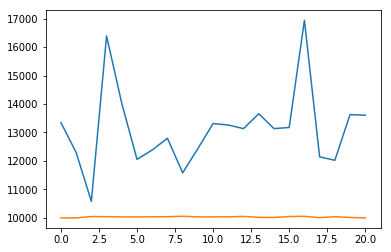

In [31]:
plt.plot(range(len(boxy)),values,rest)

# LOOP con fees

In [32]:
def price_rets_looper_fee(init_pos, late_pos, assets_past=np.array([])):
    global rets
    rets = np.log(frame[init_pos:late_pos]/frame[init_pos:late_pos].shift(1))
    prices = frame.iloc[(init_pos-10):(init_pos+10)]
    prices.fillna(method='pad', axis=0, inplace=True)
    prices.fillna(method ="bfill", axis = 0, inplace=True)
    prices = prices.iloc[10]
    prices_to = prices.copy()
    assets_used = np.where(prices.isnull()*1 ==0) ###saves the assets which are not Nan
    assets_used = np.ravel(np.asarray(assets_used))
    if assets_past.size:
        prices_past = prices.values[assets_past]
    else:
        prices_past = 0
    prices = prices.values[assets_used]  #eliminates all those which are not
    rets = rets.iloc[:,assets_used][1:] #returns of the assets used
    rets.fillna(method='pad', axis=0, inplace=True)
    rets.fillna(method ='bfill',axis=0, inplace=True)
    return prices, rets, assets_used, prices_past, prices_to


def money_saver_with_fees(prev_quant, quant, next_prices, next_prices_past,box, prev_assets_id, 
                next_assets_id, invy,
                fees_abs, fees_rel, asset_2past, prices_past, init_inv,meth,
                degree=1):
    
    global_prev_quant = np.zeros(len(frame.columns))
    global_prev_quant[prev_assets_id] = prev_quant
    global_prices = np.zeros(len(frame.columns))
    global_prices[next_assets_id] = next_prices
    global_prices[prev_assets_id] = next_prices_past
    
    #value = rest+money_box       then liquid is added
    
    global_2_quant = np.zeros(len(frame.columns))
    global_2_quant[asset_2past] = quant
    fee_array = np.abs(global_prev_quant-global_2_quant)
    abs_fees = [fees_abs for i in fee_array if i != 0.]
    abs_fees = np.sum(abs_fees)
    prices_past.fillna(0,inplace=True)
    rel_fees = [ fees_rel*prices_past.values[i]*fee_array[i] for i in range(len(fee_array))]
    tot_fees = abs_fees + np.sum(rel_fees)
    
    value = np.dot(global_prev_quant,global_prices)
    
    if meth == 'greed':
        invy_fo_use = invy
    elif meth == 'wait':
        invy_fo_use = max(init_inv,invy)
    money_box = max(0,(value - invy_fo_use)-tot_fees)
    money_box = money_box*degree
    if ((value - invy_fo_use)-tot_fees)>0:
        rest = invy_fo_use +(value-invy_fo_use-tot_fees)*(1-degree)
    else: rest = value-tot_fees
    
    box.append([value,rest, money_box, tot_fees ])
    return rest    

In [33]:
initial_pos = 252
time_values = [10,20,60,120,240]
cantidades = [1000,5000,10000,50000,100000]
degree = np.linspace(0.,1.,6)
fees ={'absolute':[0,2,4],
      'relative':[0,0.04,0.1]}

In [37]:
def loop_with_fees(init_pos, time_value, inv,fees_abs, fees_rel,method = "wait", degree=1):
    prices, rets, assets_used, prices_fpast, prices_to = price_rets_looper_fee(init_pos-time_value,init_pos)
    quantities,liquid, value_opt= optimizer(prices,inv,rets)
    box = []
    quantities_p = np.zeros_like(quantities)
    assets_used_p =assets_used
    print(frame.index[init_pos])
    for i in range(0,((len(frame)-initial_pos) // time_value)):
        next_pos = init_pos+time_value
        prices, rets, assets_used_f, prices_fpast, prices_to_2 = price_rets_looper_fee(init_pos, next_pos, assets_used )
        val = money_saver_with_fees(quantities,quantities_p, prices,prices_fpast, box, assets_used, 
                          assets_used_f, value_opt,
                          fees_abs, fees_rel,assets_used_p,prices_to,inv, method,
                          degree)
        new_inv = val +liquid
        quantities_p = quantities
        assets_used_p = assets_used
        prices_to = prices_to_2
        quantities, liquid, value_opt = optimizer(prices, new_inv,rets)
        init_pos = init_pos +time_value
        assets_used = assets_used_f
    print(frame.index[init_pos])
    return box

In [38]:
boxy = loop_with_fees(initial_pos, time_values[0], cantidades[0],fees['absolute'][2],
                      fees['relative'][2],'greed',degree[1])

/home/blue/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


2007-12-24


KeyboardInterrupt: 

In [49]:
money = [boxy[i][2] for i in range(len(boxy))]
values = [boxy[i][0] for i in range(len(boxy))] 
rest = [boxy[i][1] for i in range(len(boxy))]
fees_paid = [boxy[i][3] for i in range(len(boxy))]

In [50]:
np.sum(money)

78924.790242383984

In [51]:
boxy

[[13356.572422000001,
  12359.682111416001,
  591.07503110400012,
  405.81527948000002],
 [15192.615834999999,
  13779.631334879999,
  375.63851171999971,
  1037.3459883999999],
 [14590.981806, 13419.02943052, 0.0, 1171.9523754800002],
 [21907.76209, 19353.958788840002, 1483.9801469600004, 1069.8231541999999],
 [27016.879001000001,
  24197.470244272001,
  1212.5478045680002,
  1606.8609521600004],
 [29059.310000000001,
  26965.587489600002,
  695.63299739999991,
  1398.0895129999999],
 [33272.808462000001,
  31081.606499376001,
  1028.5423773439998,
  1162.6595852800001],
 [39609.136651000001,
  36338.919072135999,
  1313.3248317840003,
  1956.8927470799999],
 [41875.473149999998, 38332.93635512, 493.87366027999946, 3048.6631346000004],
 [47464.603219000004,
  43212.886857224003,
  1224.3728660560009,
  3027.3434957200006],
 [57318.449816000008, 51916.602142672011, 2176.3049021680008, 3225.54277116],
 [68578.039615000016,
  62098.737040920016,
  2547.9032534800021,
  3931.3993206000005

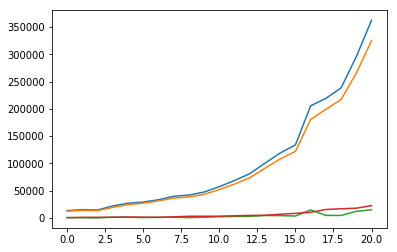

In [52]:
plt.plot(range(len(boxy)),values,rest)
plt.plot(range(len(boxy)),money, fees_paid)

## loop with fees and taxes 

In [83]:
initial_pos = 252
time_values = [10,20,60,120,240]
cantidades = [1000,5000,10000,50000,100000]
degree = np.linspace(0.,1.,6)
fees ={'absolute':[0,2,4,8],
      'relative':[0,0.004,0.01,0.02]}

In [84]:
def money_saver_with_fees_and_taxes(prev_quant, quant, next_prices, next_prices_past,box, prev_assets_id, 
                next_assets_id, invy,
                fees_abs, fees_rel, asset_2past, prices_past, init_inv,meth,tax,indices,
                degree=1):
    
    global_prev_quant = np.zeros(len(frame.columns))
    global_prev_quant[prev_assets_id] = prev_quant
    global_prices = np.zeros(len(frame.columns))
    global_prices[next_assets_id] = next_prices
    global_prices[prev_assets_id] = next_prices_past
    
    #value = rest+money_box       then liquid is added
    
    global_2_quant = np.zeros(len(frame.columns))
    global_2_quant[asset_2past] = quant
    fee_array = np.abs(global_prev_quant-global_2_quant)
    abs_fees = [fees_abs for i in fee_array if i != 0.]
    abs_fees = np.sum(abs_fees)
    prices_past.fillna(0,inplace=True)
    rel_fees = [ fees_rel*prices_past.values[i]*fee_array[i] for i in range(len(fee_array))]
    tot_fees = abs_fees + np.sum(rel_fees)
    
    value = np.dot(global_prev_quant,global_prices)
    
    if meth == 'greed':
        invy_fo_use = invy
    elif meth == 'wait':
        invy_fo_use = max(init_inv,invy)
    money_box = max(0,(value - invy_fo_use)-tot_fees)
    money_box = money_box*degree
    if ((value - invy_fo_use)-tot_fees)>0:
        rest = invy_fo_use +(value-invy_fo_use-tot_fees)*(1-degree)
    else: rest = value-tot_fees
    
    money_list = np.array([box[i][2] for i in range(len(box))])
    total_ob = np.sum(money_list[np.int(indices[0]):np.int(indices[1])+1])
    if tax == "yes":
        taxes_paid = 0.2*total_ob
    else:
        taxes_paid = 0
    box.append([value,rest, money_box, tot_fees,taxes_paid ])
    
    return rest    


def loop_with_fees_and_taxes(init_pos, time_value, inv,fees_abs, fees_rel,method = "wait", degree=1):
    prices, rets, assets_used, prices_fpast, prices_to = price_rets_looper_fee(init_pos-time_value,init_pos)
    quantities,liquid, value_opt= optimizer(prices,inv,rets)
    box = []
    quantities_p = np.zeros_like(quantities)
    assets_used_p =assets_used
    dates = []
    dates.append(frame.index[init_pos])
    abs_init_pos = init_pos
    index = np.zeros(2)
    for i in range(0,((len(frame)-initial_pos) // time_value)):
        next_pos = init_pos+time_value
        prices, rets, assets_used_f, prices_fpast, prices_to_2 = price_rets_looper_fee(init_pos, next_pos, assets_used )
        
        index[1]=i
        if count_years(frame.index[abs_init_pos],frame.index[next_pos]) > 1:
            tax = "yes"
            abs_init_pos = next_pos
            
        val = money_saver_with_fees_and_taxes(quantities,quantities_p, prices,prices_fpast, box, assets_used, 
                          assets_used_f, value_opt,
                          fees_abs, fees_rel,assets_used_p,prices_to,inv, method,tax,index,
                          degree)
        if tax=='yes':
            index[0] = i
        
        if box[i-1][0]<= 0.: break
            
        new_inv = val +liquid
        quantities_p = quantities
        assets_used_p = assets_used
        prices_to = prices_to_2
        quantities, liquid, value_opt = optimizer(prices, new_inv,rets)
        init_pos = init_pos +time_value
        assets_used = assets_used_f
        tax = "No"
        
    dates.append(frame.index[init_pos])
    return box,dates

In [108]:
boxy,dates = loop_with_fees_and_taxes(initial_pos, time_values[4], cantidades[0],fees['absolute'][3],
                      fees['relative'][3],'wait',degree[1])

/home/blue/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [109]:
money = [boxy[i][2] for i in range(len(boxy))]
money_acum = np.cumsum([boxy[i][2] for i in range(len(boxy))])
values = [boxy[i][0] for i in range(len(boxy))] 
rest = [boxy[i][1] for i in range(len(boxy))]
fees_paid = [boxy[i][3] for i in range(len(boxy))]
taxes_paid = np.array([boxy[i][4] for i in range(len(boxy))])

In [110]:
boxy

[[1443.2021359999999,
  1301.011039424,
  75.252759855999983,
  66.938336719999995,
  0.0],
 [1335.6378359999999,
  1207.9467506199999,
  0.0,
  127.69108538,
  15.050551971199997],
 [2052.9219979999998, 1806.284529904, 158.95211997599998, 87.68534812, 0.0],
 [2567.6344469999999,
  2345.7068729439998,
  126.856225736,
  95.071348319999998,
  31.790423995199998],
 [2865.2973470000002,
  2670.7470685840003,
  81.819833896000048,
  112.73044451999999,
  25.3712451472],
 [4024.0868570000002,
  3660.82210192,
  252.02399798000016,
  111.2407571,
  16.363966779200009],
 [5581.6833459999998,
  5013.7068520800003,
  349.73297401999992,
  218.24351990000002,
  50.404799596000032],
 [8652.7073579999997,
  7651.4443520719997,
  657.7840832679999,
  343.47892265999997,
  69.946594803999986],
 [13384.894356000001,
  11918.24708952,
  1053.0235688800001,
  413.62369760000001,
  131.55681665359998],
 [14131.311973,
  13233.242418536,
  345.33349888400016,
  552.73605557999997,
  210.60471377600004]]

In [111]:
(np.sum(money)-np.sum(taxes_paid))/count_years(dates[0],dates[1])

245.48584322536641

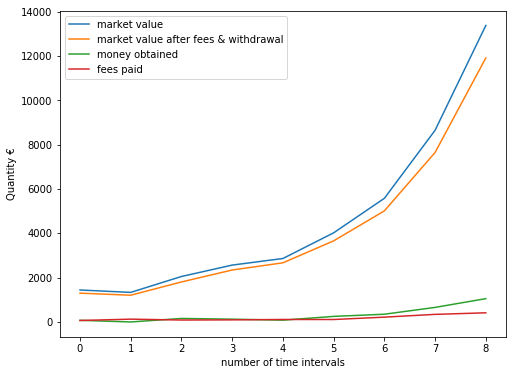

In [112]:
plt.figure(figsize=(8,6))
plt.plot(range(len(boxy)-1),values[:-1], label="market value")
plt.plot(range(len(boxy)-1),rest[:-1], label="market value after fees & withdrawal")
plt.plot(range(len(boxy)-1),money[:-1], label="money obtained")
plt.plot(range(len(boxy)-1),fees_paid[:-1], label = "fees paid")
plt.ylabel("Quantity €")
plt.xlabel("number of time intervals")
plt.legend()
plt.savefig("line1000good.png")

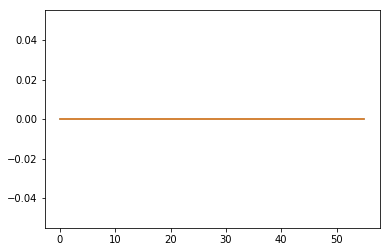

In [79]:
plt.plot(range(len(boxy)),money_acum, money_acum-taxes_paid)

In [80]:
taxes_paid

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

## SUper loop

Al final hay dos formas:
+ SOlo contar cuanto se ha ido recogiendo por año solo
+ COntar cuanto se ha ido recogiendo y cuanto queda remanente al final

Lo que se va a calcualr:

+ tablas:
    + Para cada cantidad y para todos lore % de retiro obtener el mean redit per year (en cada uno de los modos greedy y waitin
        + Hacer para los dos modos
    + valor temporal¿¿

In [66]:
initial_pos = 252
time_values = [10,20,60,120,240]
cantidades = [1000,5000,10000,50000,100000]
degree = np.linspace(0.2,1,5)
fees ={'absolute':[2,4,8],
      'relative':[0.004,0.01,0.02]}

In [67]:
print(len(degree),len(time_values))

5 5


In [68]:
result_matrix_greed = np.zeros((5,5,3,5))
fees_matrix_greed = np.zeros((5,5,3,5))
taxes_matrix_greed = np.zeros((5,5,3,5))

In [69]:
result_matrix[1,2,0]

array([   3632.66791926,   19562.40098125,   39322.71336709,
        195761.8484086 ,  389646.37262681])

In [64]:
degree

array([ 0.2,  0.4,  0.6,  0.8,  1. ])

In [70]:
for h in range(len(cantidades)):
    for l in range(len(fees['absolute'])):
        for k in range(len(time_values)):
            for j in range(len(degree)):
                print(j,k,l,h)
                boxy = []
                boxy,dates = loop_with_fees_and_taxes(initial_pos, time_values[k], cantidades[h],fees['absolute'][l],
                                                      fees['relative'][l],'greed',degree[j])
                money = [boxy[i][2] for i in range(len(boxy))]
                money_acum = np.cumsum([boxy[i][2] for i in range(len(boxy))])
                values = [boxy[i][0] for i in range(len(boxy))] 
                rest = [boxy[i][1] for i in range(len(boxy))]
                fees_paid = [boxy[i][3] for i in range(len(boxy))]
                taxes_paid = np.array([boxy[i][4] for i in range(len(boxy))])
                result = (np.sum(money)-np.sum(taxes_paid))/count_years(dates[0],dates[1])
                result_matrix_greed[j,k,l,h] = result
                feesy = np.sum(fees_paid)
                taxesy = np.sum(taxes_paid)
                fees_matrix_greed[j,k,l,h] = feesy
                taxes_matrix_greed[j,k,l,h] = taxesy

0 0 0 0


/home/blue/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


1 0 0 0
2 0 0 0
3 0 0 0
4 0 0 0
0 1 0 0
1 1 0 0
2 1 0 0
3 1 0 0
4 1 0 0
0 2 0 0
1 2 0 0
2 2 0 0
3 2 0 0
4 2 0 0
0 3 0 0
1 3 0 0
2 3 0 0
3 3 0 0
4 3 0 0
0 4 0 0
1 4 0 0
2 4 0 0
3 4 0 0
4 4 0 0
0 0 1 0
1 0 1 0
2 0 1 0
3 0 1 0
4 0 1 0
0 1 1 0
1 1 1 0
2 1 1 0
3 1 1 0
4 1 1 0
0 2 1 0
1 2 1 0
2 2 1 0
3 2 1 0
4 2 1 0
0 3 1 0
1 3 1 0
2 3 1 0
3 3 1 0
4 3 1 0
0 4 1 0
1 4 1 0
2 4 1 0
3 4 1 0
4 4 1 0
0 0 2 0
1 0 2 0
2 0 2 0
3 0 2 0
4 0 2 0
0 1 2 0
1 1 2 0
2 1 2 0
3 1 2 0
4 1 2 0
0 2 2 0
1 2 2 0
2 2 2 0
3 2 2 0
4 2 2 0
0 3 2 0
1 3 2 0
2 3 2 0
3 3 2 0
4 3 2 0
0 4 2 0
1 4 2 0
2 4 2 0
3 4 2 0
4 4 2 0
0 0 0 1
1 0 0 1
2 0 0 1
3 0 0 1
4 0 0 1
0 1 0 1
1 1 0 1
2 1 0 1
3 1 0 1
4 1 0 1
0 2 0 1
1 2 0 1
2 2 0 1
3 2 0 1
4 2 0 1
0 3 0 1
1 3 0 1
2 3 0 1
3 3 0 1
4 3 0 1
0 4 0 1
1 4 0 1
2 4 0 1
3 4 0 1
4 4 0 1
0 0 1 1
1 0 1 1
2 0 1 1
3 0 1 1
4 0 1 1
0 1 1 1
1 1 1 1
2 1 1 1
3 1 1 1
4 1 1 1
0 2 1 1
1 2 1 1
2 2 1 1
3 2 1 1
4 2 1 1
0 3 1 1
1 3 1 1
2 3 1 1
3 3 1 1
4 3 1 1
0 4 1 1
1 4 1 1
2 4 1 1
3 4 1 1
4 4 1 1
0 0 2 1


/home/blue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


1 0 2 3
2 0 2 3
3 0 2 3
4 0 2 3
0 1 2 3
1 1 2 3
2 1 2 3
3 1 2 3
4 1 2 3
0 2 2 3
1 2 2 3
2 2 2 3
3 2 2 3
4 2 2 3
0 3 2 3
1 3 2 3
2 3 2 3
3 3 2 3
4 3 2 3
0 4 2 3
1 4 2 3
2 4 2 3
3 4 2 3
4 4 2 3
0 0 0 4
1 0 0 4
2 0 0 4
3 0 0 4
4 0 0 4
0 1 0 4
1 1 0 4
2 1 0 4
3 1 0 4
4 1 0 4
0 2 0 4
1 2 0 4
2 2 0 4
3 2 0 4
4 2 0 4
0 3 0 4
1 3 0 4
2 3 0 4
3 3 0 4
4 3 0 4
0 4 0 4
1 4 0 4
2 4 0 4
3 4 0 4
4 4 0 4
0 0 1 4
1 0 1 4
2 0 1 4
3 0 1 4
4 0 1 4
0 1 1 4
1 1 1 4
2 1 1 4
3 1 1 4
4 1 1 4
0 2 1 4
1 2 1 4
2 2 1 4
3 2 1 4
4 2 1 4
0 3 1 4
1 3 1 4
2 3 1 4
3 3 1 4
4 3 1 4
0 4 1 4
1 4 1 4
2 4 1 4
3 4 1 4
4 4 1 4
0 0 2 4
1 0 2 4
2 0 2 4
3 0 2 4
4 0 2 4
0 1 2 4
1 1 2 4
2 1 2 4
3 1 2 4
4 1 2 4
0 2 2 4
1 2 2 4
2 2 2 4
3 2 2 4
4 2 2 4
0 3 2 4
1 3 2 4
2 3 2 4
3 3 2 4
4 3 2 4
0 4 2 4
1 4 2 4
2 4 2 4
3 4 2 4
4 4 2 4


In [71]:
np.save("./results_matrix_greed.npy",result_matrix_greed)
np.save("./fees_matrix_greed.npy",fees_matrix_greed)
np.save("./taxes_matrix_greed.npy",taxes_matrix_greed)


In [2]:
result_matrix = np.load("./results_matrix.npy")
fees_matrix = np.load("./fees_matrix.npy")
taxes_matrix = np.load("./taxes_matrix.npy")

In [75]:
result_matrix_greed[:,:,0,0]

array([[ 132067.03532977,   63419.94317901,    5394.2332991 ,
           1656.8495808 ,     306.32764128],
       [  55473.85566636,   20467.02265516,    3612.93694635,
           1532.22860582,     410.89205216],
       [  10219.30326913,    5361.00811468,    1854.64910871,
           1069.61246776,     409.84552995],
       [   1786.08208196,    1400.87800258,     929.5982745 ,
            687.28646298,     363.06831337],
       [    427.37406297,     469.89633975,     498.16750434,
            443.02824659,     307.25608721]])

In [6]:
import matrix2latex 

ModuleNotFoundError: No module named 'matrix2latex'